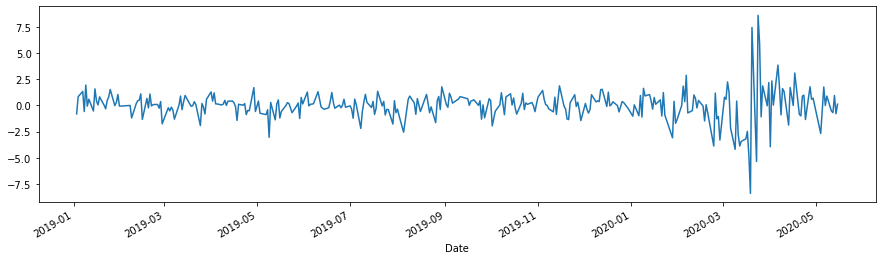

In [45]:
import pandas_datareader.data as web
import datetime as dt
import matplotlib.pyplot as plt
st = dt.datetime(2019,1,1)
en = dt.datetime(2020,5,15)
data = web.get_data_yahoo('^KS11', start=st, end=en)
returns = 100 * data['Adj Close'].pct_change().dropna()
returns.plot(figsize=(15,4))
plt.show()

In [2]:
import pandas as pd
import numpy as np
from arch import arch_model

In [3]:
garch=arch_model(returns,p=1,q=1)
res = garch.fit(update_freq=1)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 492.90165906346846
Iteration:      2,   Func. Count:     15,   Neg. LLF: 491.95745666557895
Iteration:      3,   Func. Count:     23,   Neg. LLF: 491.0588648788332
Iteration:      4,   Func. Count:     31,   Neg. LLF: 490.7090952602646
Iteration:      5,   Func. Count:     39,   Neg. LLF: 489.15401514550683
Iteration:      6,   Func. Count:     45,   Neg. LLF: 489.04565412660963
Iteration:      7,   Func. Count:     51,   Neg. LLF: 489.02106194597417
Iteration:      8,   Func. Count:     57,   Neg. LLF: 489.008614092546
Iteration:      9,   Func. Count:     63,   Neg. LLF: 489.00750526086466
Iteration:     10,   Func. Count:     69,   Neg. LLF: 489.00741144694393
Iteration:     11,   Func. Count:     75,   Neg. LLF: 489.00738106389986
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 489.0073810638828
            Iterations: 11
            Function evaluations: 75
            Gradient evaluat

In [4]:
print(res.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                      -0.002
Mean Model:             Constant Mean   Adj. R-squared:                 -0.002
Vol Model:                      GARCH   Log-Likelihood:               -489.007
Distribution:                  Normal   AIC:                           986.015
Method:            Maximum Likelihood   BIC:                           1001.27
                                        No. Observations:                  335
Date:                Sun, May 24 2020   Df Residuals:                      331
Time:                        01:48:20   Df Model:                            4
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0575  5.265e-02      1.092      0.275 [-4.56

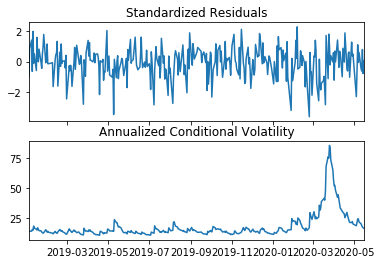

In [5]:
res.plot(annualize='D')
plt.show()

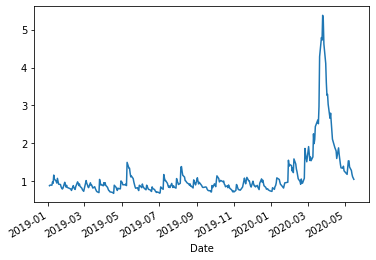

In [6]:
res.conditional_volatility["2018":"2020"].plot()
plt.show()

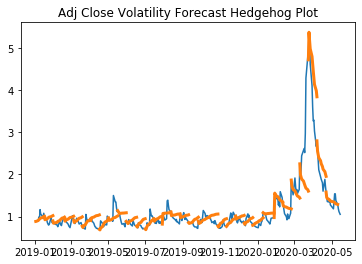

In [7]:
res.hedgehog_plot()
plt.show()

In [8]:
import statsmodels.api as sm

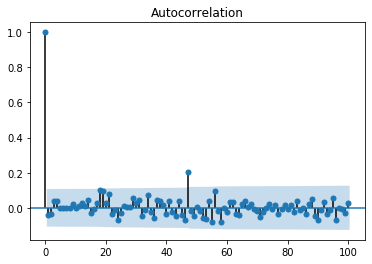

In [9]:
normalized1 = returns / res.conditional_volatility
normalized1 = normalized1 - normalized1.mean()
sm.graphics.tsa.plot_acf(normalized1**2, lags=100)
plt.show()

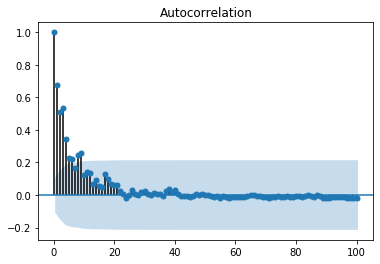

In [10]:
sm.graphics.tsa.plot_acf((returns - returns.mean())**2, lags=100)
plt.show()

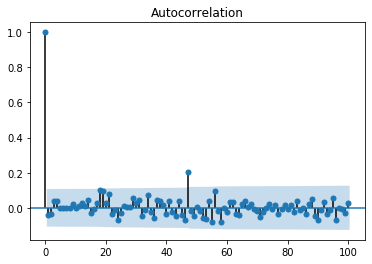

In [11]:
normalized1 = returns / res.conditional_volatility
normalized1 = normalized1 - normalized1.mean()
sm.graphics.tsa.plot_acf(normalized1**2, lags=100)
plt.show()

In [12]:
res.conditional_volatility["2019":"2020"]

Date
2019-01-03    0.886338
2019-01-04    0.902422
2019-01-07    0.900461
2019-01-08    0.987892
2019-01-09    0.950387
                ...   
2020-05-11    1.287116
2020-05-12    1.188636
2020-05-13    1.122084
2020-05-14    1.087100
2020-05-15    1.054632
Name: cond_vol, Length: 335, dtype: float64

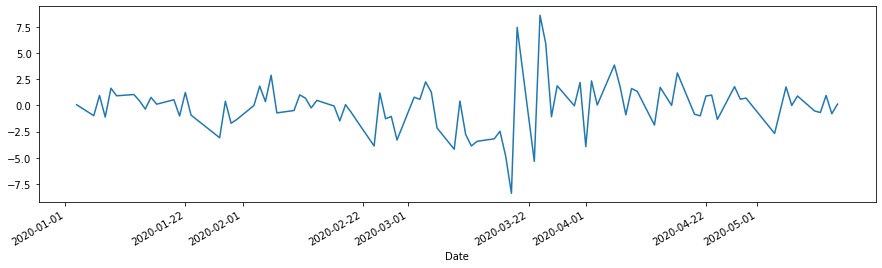

In [13]:
st = dt.datetime(2020,1,1)
en = dt.datetime(2020,5,15)
data = web.get_data_yahoo('^KS11', start=st, end=en)
returns = 100 * data['Adj Close'].pct_change().dropna()
returns.plot(figsize=(15,4))
plt.show()

In [14]:
garch=arch_model(returns,p=1,q=1)
res1 = garch.fit(update_freq=1)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 187.44883056210156
Iteration:      2,   Func. Count:     16,   Neg. LLF: 187.07194508516397
Iteration:      3,   Func. Count:     24,   Neg. LLF: 186.3768499275069
Iteration:      4,   Func. Count:     32,   Neg. LLF: 186.03421816418378
Iteration:      5,   Func. Count:     39,   Neg. LLF: 185.22921261989478
Iteration:      6,   Func. Count:     46,   Neg. LLF: 185.21372022574437
Iteration:      7,   Func. Count:     53,   Neg. LLF: 185.2088385894318
Iteration:      8,   Func. Count:     59,   Neg. LLF: 185.20851071146376
Iteration:      9,   Func. Count:     65,   Neg. LLF: 185.20812711518735
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 185.20812711535876
            Iterations: 9
            Function evaluations: 65
            Gradient evaluations: 9


In [15]:
print(res1.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                      -0.004
Mean Model:             Constant Mean   Adj. R-squared:                 -0.004
Vol Model:                      GARCH   Log-Likelihood:               -185.208
Distribution:                  Normal   AIC:                           378.416
Method:            Maximum Likelihood   BIC:                           388.415
                                        No. Observations:                   90
Date:                Sun, May 24 2020   Df Residuals:                       86
Time:                        01:48:23   Df Model:                            4
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0486      0.143      0.339      0.735 [ -0.233,  0.33

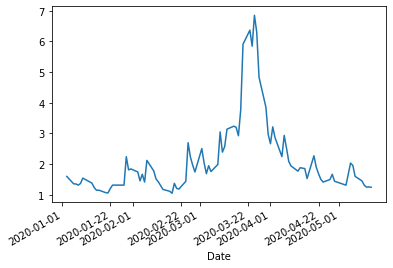

In [16]:
res1.conditional_volatility["2018":"2020"].plot()
plt.show()

In [17]:
res1.conditional_volatility["2019":"2020"]

Date
2020-01-03    1.601101
2020-01-06    1.358649
2020-01-07    1.354372
2020-01-08    1.316912
2020-01-09    1.370327
                ...   
2020-05-11    1.453355
2020-05-12    1.310242
2020-05-13    1.250939
2020-05-14    1.257429
2020-05-15    1.246714
Name: cond_vol, Length: 90, dtype: float64

In [18]:
returns = returns**2

In [19]:
returns = returns.apply(np.sqrt)

In [20]:
returns

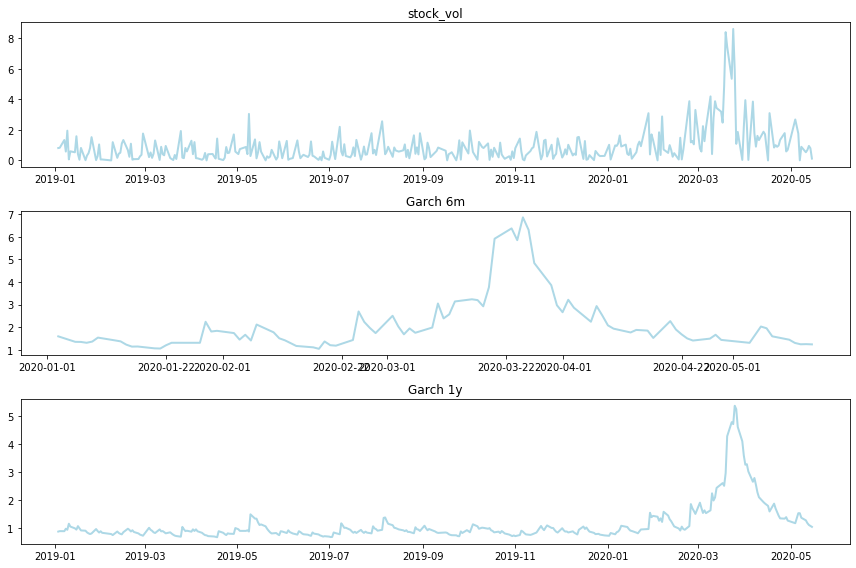

In [49]:
plt.figure(figsize = (12,8))
plt.subplot(3, 1, 1)
plt.plot(returns, color = 'lightblue',linewidth=2)
plt.title('stock_vol')

plt.subplot(3, 1, 2)
plt.plot(res1.conditional_volatility["2019":"2020"],color = 'lightblue',linewidth=2)
plt.title('Garch 6m')

plt.subplot(3, 1, 3)
plt.plot(res.conditional_volatility["2019":"2020"],color = 'lightblue',linewidth=2)
plt.title('Garch 1y')

plt.tight_layout()
plt.show()

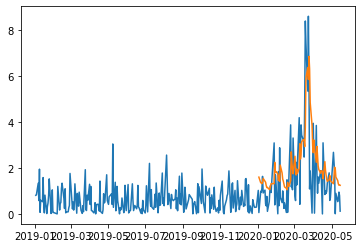

In [50]:
plt.plot(returns.index, returns)
plt.plot(res1.conditional_volatility["2019":"2020"].index, res1.conditional_volatility["2019":"2020"])

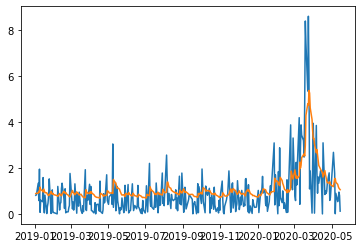

In [51]:
plt.plot(returns.index, returns)
plt.plot(res.conditional_volatility["2019":"2020"].index, res.conditional_volatility["2019":"2020"])

In [52]:
st = dt.datetime(2019,1,1)
en = dt.datetime(2020,5,15)
data = web.get_data_yahoo('^KS11', start=st, end=en)
returns_norm = 100 * data['Adj Close'].pct_change().dropna()

In [53]:
returns_norm

Date
2019-01-03   -0.810948
2019-01-04    0.830117
2019-01-07    1.335654
2019-01-08   -0.580725
2019-01-09    1.947392
                ...   
2020-05-11   -0.535503
2020-05-12   -0.683579
2020-05-13    0.949448
2020-05-14   -0.796739
2020-05-15    0.120526
Name: Adj Close, Length: 335, dtype: float64

In [109]:
file_path = 'C:/Users/elris/Dropbox/정규리턴1.xlsx'
norm_return = pd.read_excel(file_path,index_col=0)

In [111]:
norm_return = norm_return['몬테카를로']['2019-01-03':]

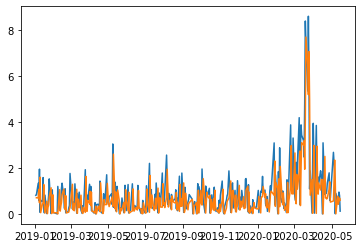

In [112]:
plt.plot(returns.index, returns)
plt.plot(norm_return.index, norm_return)